In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
from lxml import etree
import pandas as pd

# Function to extract text from an element, or return None if the element does not exist
def get_element_text(element, tag):
    child = element.find(tag)
    return child.text if child is not None else None

# Load and parse the XML file
file_path = 'acm-sf-chapter-hackathon-small/small_product_data.xml'  # Replace with your file path
tree = etree.parse(file_path)

# Find all the unique tags in the file
all_tags = set()
for element in tree.iter():
    all_tags.add(element.tag)

# Initialize a list to hold all product data
products_data = []

# Iterate over each product in the XML file
for product in tree.iterfind('.//product'):
    # Extract data for each tag
    product_data = {tag: get_element_text(product, tag) for tag in all_tags}
    products_data.append(product_data)

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(products_data)

# Display the DataFrame
print(df.head())

  tradeInValue onlineAvailabilityUpdateDate   format accessoriesImage product  \
0         5.00          2012-07-10T18:46:52  DVD-ROM             None    None   
1         8.00          2012-07-03T01:24:58  DVD-ROM             None    None   
2         2.00          2012-07-02T22:46:01  DVD-ROM             None    None   
3         6.00          2012-07-02T20:27:14  DVD-ROM             None    None   
4         5.00          2012-07-03T01:13:42  DVD-ROM             None    None   

  preOwnedSku bundledIn cjAffiliateUrl salePrice       itemUpdateDate  ...  \
0        None      None           None     19.99  2012-07-28T10:15:45  ...   
1        None      None           None     29.99  2012-07-28T10:22:27  ...   
2        None      None           None     19.99  2012-07-28T10:22:59  ...   
3        None      None           None     12.99  2012-07-28T10:23:26  ...   
4        None      None           None      9.99  2012-07-28T10:23:52  ...   

  quantityLimit imageUrl                clas

In [3]:
df.head()

,tradeInValue,onlineAvailabilityUpdateDate,format,accessoriesImage,product,preOwnedSku,bundledIn,cjAffiliateUrl,salePrice,itemUpdateDate,...,quantityLimit,imageUrl,class,icrStartDate,onlineAvailabilityText,angleImage,regularPrice,source,numberOfPlayers,salesRankShortTerm
0,5.00,2012-07-10T18:46:52,DVD-ROM,None,None,None,None,None,19.99,2012-07-28T10:15:45,...,3,None,VIDEO GAME SOFTWARE,None,Shipping: Usually ships in 1-2 business days,None,19.99,bestbuy,None,4814
1,8.00,2012-07-03T01:24:58,DVD-ROM,None,None,None,None,None,29.99,2012-07-28T10:22:27,...,3,None,VIDEO GAME SOFTWARE,None,Shipping: Not available,None,29.99,bestbuy,None,None
2,2.00,2012-07-02T22:46:01,DVD-ROM,None,None,None,None,None,19.99,2012-07-28T10:22:59,...,3,None,VIDEO GAME SOFTWARE,None,Shipping: Not available,None,19.99,bestbuy,1-2,21450
3,6.00,2012-07-02T20:27:14,DVD-ROM,None,None,None,None,None,12.99,2012-07-28T10:23:26,...,1,None,VIDEO GAME SOFTWARE,None,Shipping: Not available,None,12.99,bestbuy,1,None
4,5.00,2012-07-03T01:13:42,DVD-ROM,None,None,None,None,None,9.99,2012-07-28T10:23:52,...,3,None,VIDEO GAME SOFTWARE,None,Shipping: Not available,None,9.99,bestbuy,1-4,None


In [8]:
df.columns

Index(['tradeInValue', 'onlineAvailabilityUpdateDate', 'format',
       'accessoriesImage', 'product', 'preOwnedSku', 'bundledIn',
       'cjAffiliateUrl', 'salePrice', 'itemUpdateDate',
       ...
       'quantityLimit', 'imageUrl', 'class', 'icrStartDate',
       'onlineAvailabilityText', 'angleImage', 'regularPrice', 'source',
       'numberOfPlayers', 'salesRankShortTerm'],
      dtype='object', length=125)

In [9]:
df.shape

(874, 125)

In [14]:
df['sku'].unique()

array(['1004622', '1010544', '1011067', '1011491', '1011831', '1012721',
       '1012876', '1013666', '1014064', '1032361', '1052221', '1066233',
       '1066515', '1066551', '1067848', '1067948', '1078792', '1092494',
       '1094401', '1121355', '1121373', '1142357', '1154546', '1161734',
       '1170735', '1179927', '1179963', '1180061', '1180104', '1182175',
       '1184298', '1199284', '1207275', '1208344', '1208468', '1208486',
       '1208753', '1228939', '1228993', '1243179', '1251132', '1254078',
       '1309041', '1315467', '1315528', '1318437', '1324987', '1330193',
       '1331217', '1338007', '1338089', '1404133', '1404415', '1431386',
       '1440189', '1443131', '1450317', '1450556', '1470129', '1470147',
       '1475036', '1493444', '1493639', '1508787', '1511584', '1515341',
       '1535584', '1535718', '1563392', '1563461', '1579138', '1580049',
       '1617038', '1685052', '1775051', '1776209', '1778076', '1778119',
       '1802089', '1807118', '1808056', '1814093', 

In [15]:
df.to_csv('acm-sf-chapter-hackathon-small/small_product_data.csv')

In [1]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
csv_file_path = 'acm-sf-chapter-hackathon-small/small_product_data.csv'  # Replace with your actual file path
df = pd.read_csv(csv_file_path)

# Step 1: Remove unnecessary columns
# Remove columns that are entirely empty or have a high percentage of missing values
missing_value_threshold = 0.8  # Threshold for dropping columns
columns_to_drop = df.columns[df.isna().mean() > missing_value_threshold]
df_cleaned = df.drop(columns=columns_to_drop)

# Step 2: Handle Missing Values
# Fill missing values in numerical columns with their mean
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].mean())

# Fill missing values in categorical columns with 'Unknown'
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna('Unknown')

# Step 3: Correct Data Types
# Convert any columns that should be datetime objects
datetime_cols = [col for col in df_cleaned.columns if 'date' in col.lower() or 'time' in col.lower()]
for col in datetime_cols:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce')

# Display the cleaned DataFrame
print(df_cleaned.head())

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('acm-sf-chapter-hackathon-small/small_product_cleaned_file.csv', index=False)  # Replace with your desired file path


   Unnamed: 0  tradeInValue onlineAvailabilityUpdateDate   format  salePrice  \
0           0           5.0          2012-07-10 18:46:52  DVD-ROM      19.99   
1           1           8.0          2012-07-03 01:24:58  DVD-ROM      29.99   
2           2           2.0          2012-07-02 22:46:01  DVD-ROM      19.99   
3           3           6.0          2012-07-02 20:27:14  DVD-ROM      12.99   
4           4           5.0          2012-07-03 01:13:42  DVD-ROM       9.99   

       itemUpdateDate  advertisedPriceRestriction  \
0 2012-07-28 10:15:45                       False   
1 2012-07-28 10:22:27                       False   
2 2012-07-28 10:22:59                       False   
3 2012-07-28 10:23:26                       False   
4 2012-07-28 10:23:52                       False   

                                 longDescriptionHtml  salesRankLongTerm  \
0  <script LANGUAGE="JavaScript"> var ESRB = "m";...             5738.0   
1  <script LANGUAGE="JavaScript"> var ESRB = "e";.

In [2]:
df_cleaned.shape


(874, 75)

In [7]:
df_cleaned.columns

Index(['Unnamed: 0', 'tradeInValue', 'onlineAvailabilityUpdateDate', 'format',
       'salePrice', 'itemUpdateDate', 'advertisedPriceRestriction',
       'longDescriptionHtml', 'salesRankLongTerm', 'image', 'active',
       'categoryPath', 'inStoreAvailabilityText', 'shippingWeight', 'offers',
       'details', 'addToCartUrl', 'bestSellingRank', 'orderable', 'subclassId',
       'shortDescriptionHtml', 'sku', 'inStoreAvailabilityUpdateDate',
       'onSale', 'freeShipping', 'onlineAvailabilityTextHtml', 'department',
       'esrbRating', 'releaseDate', 'type', 'new', 'manufacturer',
       'departmentId', 'thumbnailImage', 'shortDescription', 'url',
       'mobileUrl', 'platform', 'onlineAvailability', 'bestBuyItemId',
       'frequentlyPurchasedWith', 'outletCenter', 'activeUpdateDate',
       'homeDelivery', 'features', 'digital', 'shippingCost', 'name',
       'startDate', 'upc', 'specialOrder', 'subclass', 'inStoreAvailability',
       'inStoreAvailabilityTextHtml', 'customerReview

In [3]:
df_cleaned['longDescriptionHtml']

0      <script LANGUAGE="JavaScript"> var ESRB = "m";...
1      <script LANGUAGE="JavaScript"> var ESRB = "e";...
2      <script LANGUAGE="JavaScript"> var ESRB = "e10...
3      <script LANGUAGE="JavaScript"> var ESRB = "e";...
4      <script LANGUAGE="JavaScript"> var ESRB = "e";...
                             ...                        
869    <script LANGUAGE="JavaScript"> var ESRB = "t";...
870    <!--------demo code-------------> <br><br> <st...
871    <script LANGUAGE="JavaScript"> var ESRB = "m";...
872                                              Unknown
873                                              Unknown
Name: longDescriptionHtml, Length: 874, dtype: object

In [4]:
df_cleaned.isnull().sum()

Unnamed: 0                      0
tradeInValue                    0
onlineAvailabilityUpdateDate    0
format                          0
salePrice                       0
                               ..
onlineAvailabilityText          0
regularPrice                    0
source                          0
numberOfPlayers                 0
salesRankShortTerm              0
Length: 75, dtype: int64

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the datasets
train_file_path = 'acm-sf-chapter-hackathon-small/train.csv'  # Replace with your actual file path for train data


train_df = pd.read_csv(train_file_path)

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)

# Fit and transform the queries
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['query'])

# Rename 'sku' column in original dataset to avoid confusion
df_cleaned.rename(columns={'sku': 'game_sku'}, inplace=True)

# Join the train dataset with the original dataset on the 'sku' field
train_with_game_info = train_df.join(df_cleaned.set_index('game_sku'), on='sku')

# Save the joined dataset to a new CSV file
train_with_game_info.to_csv('acm-sf-chapter-hackathon-small/joined_train_data.csv', index=False)  # Replace with your desired file path

# Displaying the first few rows of the joined dataset for verification
print(train_with_game_info.head())


                                       user      sku      category  \
0  0001cd0d10bbc585c9ba287c963e00873d4c0bfd  2032076  abcat0701002   
0  0001cd0d10bbc585c9ba287c963e00873d4c0bfd  2032076  abcat0701002   
1  00033dbced6acd3626c4b56ff5c55b8d69911681  9854804  abcat0701002   
1  00033dbced6acd3626c4b56ff5c55b8d69911681  9854804  abcat0701002   
2  00033dbced6acd3626c4b56ff5c55b8d69911681  2670133  abcat0701002   

          query               click_time               query_time  Unnamed: 0  \
0  gears of war  2011-10-09 17:22:56.101  2011-10-09 17:21:42.917       177.0   
0  gears of war  2011-10-09 17:22:56.101  2011-10-09 17:21:42.917       187.0   
1  Gears of war  2011-09-25 13:35:42.198  2011-09-25 13:35:33.234       819.0   
1  Gears of war  2011-09-25 13:35:42.198  2011-09-25 13:35:33.234       836.0   
2  Gears of war  2011-09-25 13:36:08.668  2011-09-25 13:35:33.234       275.0   

   tradeInValue onlineAvailabilityUpdateDate   format  ...  \
0           6.0          2012-

In [24]:
train_with_game_info['longDescription']

0        Learn more about Gears of War Triple Pack. (Fl...
0        Learn more about Gears of War Triple Pack. (Fl...
1        Learn more about Gears of War 3. (Flash demo) ...
1        Learn more about Gears of War 3. (Flash demo) ...
2        SynopsisFight for survival, ensure your missio...
                               ...                        
42362    SynopsisWhen night falls on Gotham and the see...
42363    SynopsisSaturday. To some, it's a day off from...
42363    SynopsisSaturday. To some, it's a day off from...
42364    Learn more about Forza Motorsport 4: Limited C...
42364    Learn more about Forza Motorsport 4: Limited C...
Name: longDescription, Length: 84431, dtype: object

In [26]:
train_with_game_info['longDescription'] = train_with_game_info['longDescription'].fillna('')

In [27]:
tfidf_vectorizer_game_desc = TfidfVectorizer(stop_words='english', lowercase=True)
game_desc_tfidf = tfidf_vectorizer_game_desc.fit_transform(train_with_game_info['longDescription'])


In [29]:
import scipy.sparse as sp
combined_features = sp.hstack([tfidf_matrix, game_desc_tfidf], format='csr')


ValueError: Mismatching dimensions along axis 0: {42365, 84431}

In [31]:
# Prepare the combined feature set
combined_features = []

for _, row in train_df.iterrows():
    query_vector = tfidf_matrix[_]  # TF-IDF vector of the query
    sku = row['sku']
    
    # Check if the SKU exists in the game description dataset
    if sku in sku_to_index:
        game_desc_vector = game_desc_tfidf[sku_to_index[sku]]
    else:
        # Handle missing SKUs - here, we use an empty vector as a placeholder
        game_desc_vector = sp.csr_matrix((1, game_desc_tfidf.shape[1]))
    
    # Combine the query and game description vectors
    combined_vector = sp.hstack([query_vector, game_desc_vector], format='csr')
    combined_features.append(combined_vector)

# Convert the list of combined vectors to a sparse matrix
combined_features_matrix = sp.vstack(combined_features, format='csr')

# Now 'combined_features_matrix' is ready for use in the model


In [32]:
y = train_df['sku']

In [35]:
X_train, X_val, y_train, y_val = train_test_split(combined_features, y, test_size=0.2, random_state=42)

In [38]:
# Assuming 'tfidf_matrix' is the TF-IDF representation of the queries
# and 'game_desc_tfidf' is the TF-IDF representation of the game descriptions

# Initialize an empty list to store the combined vectors
combined_features = []

for i, row in train_df.iterrows():
    query_vector = tfidf_matrix[i]  # TF-IDF vector for the query

    # Check if the SKU exists in the game description dataset
    if row['sku'] in sku_to_index:
        game_desc_vector = game_desc_tfidf[sku_to_index[row['sku']]]
    else:
        # Use an empty vector for missing SKUs
        game_desc_vector = sp.csr_matrix((1, game_desc_tfidf.shape[1]))

    # Combine the query vector and the game description vector
    combined_vector = sp.hstack([query_vector, game_desc_vector], format='csr')
    combined_features.append(combined_vector)

# Convert the list of combined vectors into a single sparse matrix
combined_features_matrix = sp.vstack(combined_features, format='csr')



In [42]:
# Now you can use 'combined_features_matrix' for training the model
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(combined_features_matrix, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000, verbose=True)
model.fit(X_train, y_train)



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =      4579340     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.03400D+05    |proj g|=  2.25411D+03


 This problem is unconstrained.



At iterate   50    f=  1.71470D+04    |proj g|=  8.67090D+01

At iterate  100    f=  1.68334D+04    |proj g|=  2.04611D+00

At iterate  150    f=  1.68305D+04    |proj g|=  1.86838D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    188    204      1     0     0   1.716D-01   1.683D+04
  F =   16830.510259457860     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


LogisticRegression(max_iter=1000, verbose=True)

In [43]:
# Rest of the code remains the same for prediction and evaluation


# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8900035406585625
Classification Report:
               precision    recall  f1-score   support

     1004622       1.00      1.00      1.00         6
     1010544       1.00      1.00      1.00         2
     1011491       1.00      1.00      1.00        24
     1011831       0.00      0.00      0.00         2
     1012721       1.00      0.91      0.95        22
     1013666       1.00      1.00      1.00         9
     1032361       1.00      1.00      1.00        36
     1052221       1.00      1.00      1.00         3
     1066233       0.60      0.75      0.67         4
     1066515       1.00      1.00      1.00         4
     1066551       1.00      1.00      1.00        14
     1067848       1.00      1.00      1.00         7
     1067948       1.00      1.00      1.00         1
     1078792       1.00      1.00      1.00        23
     1092494       0.97      0.92      0.94        36
     1094401       0.00      0.00      0.00         1
     1121355       1.00     

/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming the model has been trained and predictions made (y_pred)
# on the validation set (X_val, y_val)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_val, y_pred)

# ROC Curve and AUC Score (for binary classification)
# For multi-class, AUC can be calculated differently
# fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:,1])
# auc_score = roc_auc_score(y_val, model.predict_proba(X_val)[:,1])

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[ 6  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  1  0]
 [ 0  0  0 ...  0 13  0]
 [ 0  0  0 ...  0  0 22]]

Classification Report:
               precision    recall  f1-score   support

     1004622       1.00      1.00      1.00         6
     1010544       1.00      1.00      1.00         2
     1011491       1.00      1.00      1.00        24
     1011831       0.00      0.00      0.00         2
     1012721       1.00      0.91      0.95        22
     1013666       1.00      1.00      1.00         9
     1032361       1.00      1.00      1.00        36
     1052221       1.00      1.00      1.00         3
     1066233       0.60      0.75      0.67         4
     1066515       1.00      1.00      1.00         4
     1066551       1.00      1.00      1.00        14
     1067848       1.00      1.00      1.00         7
     1067948       1.00      1.00      1.00         1
     1078792       1.00      1.00      1.00

/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

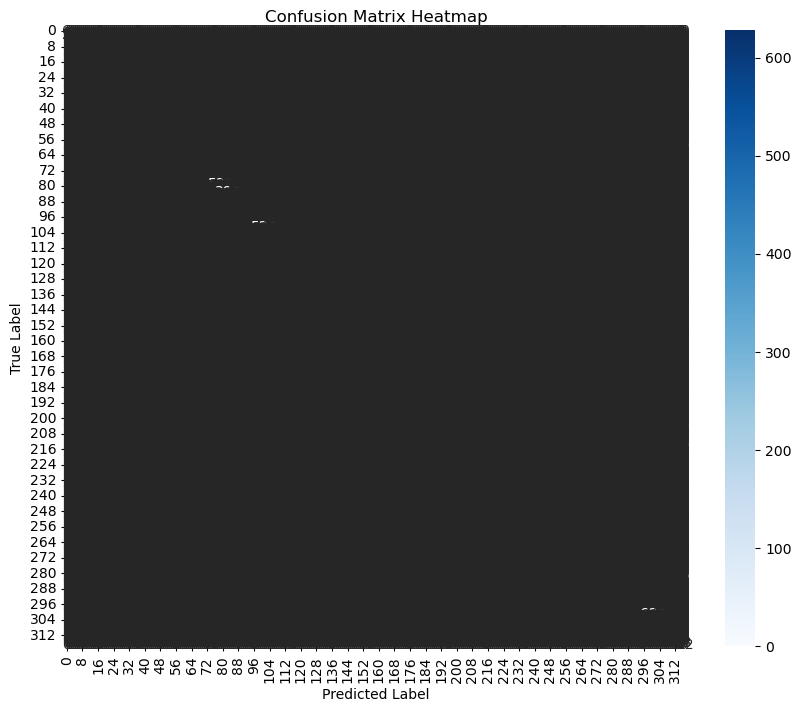

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming conf_matrix is your confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [49]:
# Get unique class labels
class_labels = train_df['sku'].unique()

# Generate a mapping of class label to index
class_to_index = {label: index for index, label in enumerate(class_labels)}


/var/folders/xn/0t54s3_n45x_5mpr1jjh4f0r0000gn/T/ipykernel_4566/805555226.py:11: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


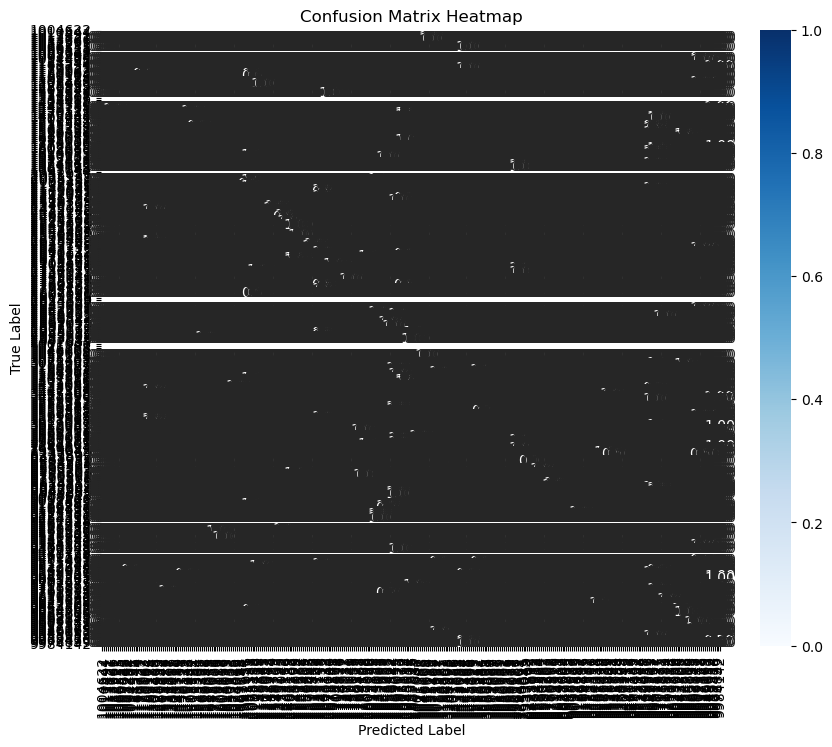

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, class_names, normalize=False):
    """
    Plots a confusion matrix. If normalize is set to True, the rows are normalized to sum to 1.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
    else:
        fmt = 'd'
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt=fmt, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

# Assuming you have a confusion matrix 'conf_matrix' and a list of class names 'class_names'
# Set the diagonal to zero to highlight misclassifications
np.fill_diagonal(conf_matrix, 0)

# Plot the modified confusion matrix
plot_confusion_matrix(conf_matrix, class_names=unique_classes, normalize=True)


In [47]:
import numpy as np

unique_classes = np.unique(y_val)
y_bin = label_binarize(y_val, classes=unique_classes)
n_classes = y_bin.shape[1]

for i, class_label in enumerate(unique_classes):
    if class_label in train_df['sku'].unique():
        try:
            class_auc = roc_auc_score(y_bin[:, i], model.predict_proba(X_val)[:, i])
            print(f"AUC for class {class_label}: {class_auc}")
        except ValueError as e:
            print(f"Cannot compute AUC for class {class_label}: {e}")


AUC for class 1004622: 1.0
AUC for class 1010544: 1.0
AUC for class 1011491: 0.998806564879473
AUC for class 1011831: 0.985834021957266
AUC for class 1012721: 0.9851335506287584
AUC for class 1013666: 0.8942317790380172
AUC for class 1032361: 0.6988924446551565
AUC for class 1052221: 0.8825265643447462
AUC for class 1066233: 0.8835163537607746
AUC for class 1066515: 0.9471602314322825
AUC for class 1066551: 0.7837468123553949
AUC for class 1067848: 0.8735952212210186
AUC for class 1067948: 0.9897308781869688
AUC for class 1078792: 0.7366709544635967
AUC for class 1092494: 0.601047963336099
AUC for class 1094401: 0.9701369216241738
AUC for class 1121355: 0.9275764372565223
AUC for class 1154546: 0.8873666391086965
AUC for class 1161734: 0.875
AUC for class 1170735: 0.9548459449887853
AUC for class 1179927: 0.9256354612062483
AUC for class 1179963: 0.8342614154095372
AUC for class 1180061: 0.8322707595434868
AUC for class 1180104: 0.6840751056852752
AUC for class 1182175: 0.6890577651515

AUC for class 3566857: 0.9391756230069683
AUC for class 3569099: 0.8109065155807365
AUC for class 3581961: 0.9376623376623375
AUC for class 3617069: 0.9493626062322947
AUC for class 3617087: 0.9311850802644003
AUC for class 3619085: 0.9554952189824106
AUC for class 3622159: 0.9569067296340024
AUC for class 3650081: 0.8831168831168831
AUC for class 3650391: 0.9948636202621325
AUC for class 3650503: 0.9852455146364494
AUC for class 3668336: 0.8408553875236294
AUC for class 3686213: 0.991736512808405
AUC for class 3687063: 0.9859537299339
AUC for class 3720071: 0.9763900365954432
AUC for class 3905186: 0.9367327667610954
AUC for class 3967307: 0.9493626062322946
AUC for class 7294661: 0.7222272814198943
AUC for class 7849894: 0.9690745986779981
AUC for class 7959033: 0.6958811693691562
AUC for class 7959042: 0.9783994334277621
AUC for class 8237259: 0.9169471011925847
AUC for class 8237302: 0.7067108533554267
AUC for class 8323593: 0.8355776045357901
AUC for class 8438032: 0.9434341048653

/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true posi

/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true posi

KeyError: 404

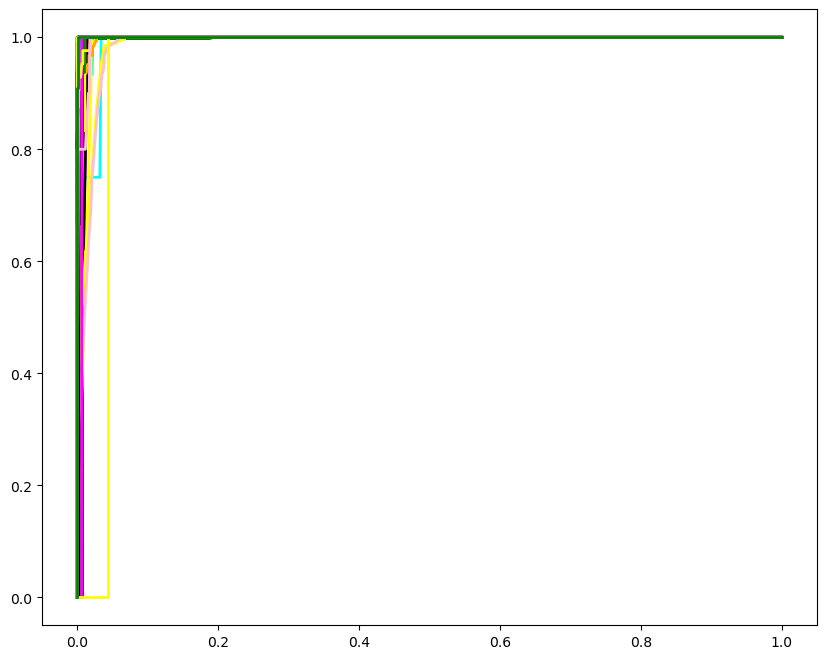

In [52]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Ensure we only consider classes that were seen during training
seen_classes = model.classes_

# Binarize the output labels based on the classes seen during training
y_bin = label_binarize(y_val, classes=seen_classes)
n_classes = y_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Get the prediction probabilities for each class
y_score = model.predict_proba(X_val)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Now, you can use the fpr, tpr, and roc_auc to plot the ROC curves.


# Plot all ROC curves
plt.figure(figsize=(10, 8))

colors = cycle(['blue', 'red', 'green', 'orange', 'black', 'purple', 'cyan', 'magenta', 'yellow', 'pink'])
for i, color in zip(range(len(class_labels)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(class_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()


In [54]:
# Extracting coefficients from the logistic regression model
feature_names = tfidf_vectorizer.get_feature_names() + tfidf_vectorizer_game_desc.get_feature_names()
# If you've used additional features, append their names to feature_names

# Get the coefficients from the model
coefficients = model.coef_[0]  # For multi-class, this needs to be adapted

# Map coefficients to feature names
feature_importance = zip(feature_names, coefficients)

# Sort features by absolute value of coefficient
sorted_features = sorted(feature_importance, key=lambda x: -abs(x[1]))

# Display the features with the highest impact
print("Top influential features:")
for feature, coef in sorted_features[:20]:  # Adjust the number to display as needed
    print(f"{feature}: {coef}")


Top influential features:
sniper: 3.962153825331674
outlet_center_new_arrivals: 3.7088096784698164
ghost: 1.5349465125906825
warrior: 1.220642588317431
gun: 1.147155176524653
duty: 0.9995764266445817
battles: 0.9725250090287909
warfare: 0.9572664985317914
modern: 0.9163980326552366
snipet: 0.8595321205600003
wolfenstein: 0.8536822737480789
progression: 0.7648689758639978
armor: 0.6779277232237837
epic: 0.6765420663194841
snipper: 0.6119685944289326
fellow: 0.5590813866693879
dynasty: 0.5546094193332066
survival: 0.5465073316626788
kinect: 0.5360824330837696
soldiers: 0.4948505216892979


/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [56]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.3/450.3 kB 1.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [59]:
import shap

# Initialize the SHAP Explainer
explainer = shap.LinearExplainer(model, X_train)

# Compute SHAP values for a single prediction
shap_values = explainer.shap_values(X_val[0])

# Select the SHAP values for the first class (or another class of interest)
shap_values_class = shap_values[0]  # Index 0 for the first class

# Convert the first instance of your validation set from sparse to dense
first_instance_dense = X_val[0].toarray()

# Now, attempt to plot the SHAP values again for the first class and first instance
shap.force_plot(explainer.expected_value[0],  # Expected value for the first class
                shap_values_class[0],        # SHAP values for the first instance
                first_instance_dense,         # The first instance's feature values in dense format
                feature_names=feature_names)  # Feature names


In [60]:
df_cleaned['title']

KeyError: 'title'

In [61]:
from gensim.models import Word2Vec, KeyedVectors

# Load pre-trained word vectors
# Note: You need to download a pre-trained model before loading it, this is just an example
word_vectors = KeyedVectors.load_word2vec_format('path/to/word2vec.bin', binary=True)

# Define a function to convert titles into average word vectors
def document_vector(doc):
    # Remove out-of-vocabulary words
    doc = [word for word in doc if word in word_vectors.vocab]
    if not doc:
        return np.zeros(word_vectors.vector_size)
    return np.mean(word_vectors[doc], axis=0)

# Apply the function to your text data
df_cleaned['vectorized_title'] = df_cleaned['title'].apply(lambda x: document_vector(x.split()))

# If 'vectorized_title' is not already a list of vectors, convert it
vectorized_titles = np.array(df_cleaned['vectorized_title'].tolist())

# Now 'vectorized_titles' can be used as part of your feature set


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/word2vec.bin'

In [63]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 2.2 MB/s eta 0:00:00a 0:00:010m
Note: you may need to restart the kernel to use updated packages.


In [64]:
import xgboost as xgb

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss')

# Train the model
xgb_clf.fit(X_train, y_train)

# Predict on the validation set
y_pred_xgb = xgb_clf.predict(X_val)

# Evaluate the model
print(classification_report(y_val, y_pred_xgb))


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403], got [         1004622          1010544          1011067          1011491
          1011831          1012721          1012876          1013666
          1014064          1032361          1052221          1066233
          1066515          1066551          1067848          1067948
          1078792          1092494          1094401          1121355
          1142357          1154546          1161734          1170735
          1179927          1179963          1180061          1180104
          1182175          1184298          1199284          1207275
          1208344          1208468          1208486          1208753
          1228939          1228993          1251132          1309041
          1315467          1315528          1318437          1324987
          1331217          1338007          1338089          1404133
          1404415          1431386          1440189          1443131
          1450317          1450556          1470129          1470147
          1475036          1493444          1493639          1508787
          1511584          1515341          1535584          1535718
          1563392          1563461          1579138          1580049
          1617038          1685052          1775051          1776209
          1778076          1778119          1807118          1808056
          1814093          1816073          1930151          1953203
          1972826          1973042          1974315          1981099
          1981345          1989198          1991044          1997154
          2010435          2011559          2011874          2032076
          2035692          2051131          2075383          2078113
          2095189          2106238          2107458          2138219
          2141045          2146641          2173065          2173135
          2202037          2212043          2248278          2281794
          2284728          2319319          2330703          2340293
          2375195          2396097          2432045          2432142
          2432276          2467129          2467183          2480232
          2524106          2525293          2540079          2541184
          2542262          2542914          2548405          2565493
          2576068          2598445          2598588          2613542
          2628429          2633103          2633149          2633158
          2643215          2663112          2670133          2671044
          2677215          2678108          2678241          2678578
          2703101          2704058          2712876          2722027
          2722585          2727253          2730972          2731025
          2737083          2737171          2749041          2755149
          2758085          2758119          2759181          2760575
          2769488          2774101          2795128          2802508
          2807036          2808872          2809529          2815178
          2823826          2823899          2824158          2833031
          2833095          2842602          2842639          2842757
          2842775          2846098          2856465          2856517
          2856544          2889044          2897055          2897073
          2897091          2897116          2903172          2935092
          2938114          2945052          2953607          2953816
          2967045          2977637          3001046          3021387
          3035168          3046066          3046603          3052076
          3052094          3052119          3055161          3071408
          3071602          3088387          3130065          3152127
          3166581          3180602          3184908          3209295
          3244621          3301256          3301556          3302121
          3431061          3432088          3433032          3447104
          3447113          3447362          3447468          3455185
          3455398          3487029          3508275          3519923
          3552327          3555951          3558579          3559384
          3559471          3559505          3559578          3566857
          3569062          3569363          3581907          3581961
          3600554          3617069          3617087          3619085
          3622159          3648174          3650045          3650081
          3650391          3650503          3651035          3655492
          3668336          3686213          3687063          3713035
          3720071          3838112          3847419          3864082
          4715623          6719688          7294616          7294661
          7689138          7836737          7849894          7959033
          7959042          8025816          8115906          8237259
          8237302          8321737          8323593          8438032
          8461915          8473608          8498609          8504353
          8533848          8534204          8564564          8589244
          8590562          8595763          8597556          8649714
          8669657          8709203          8736601          8760398
          8770868          8793326          8813313          8814811
          8829707          8878609          8882701          8887644
          8947205          8947768          8949365          8963936
          8988018          9018537          9064077          9092206
          9092563          9122683          9166742          9166797
          9189415          9194999          9215333          9215814
          9223501          9238336          9248833          9254111
          9254255          9257083          9261014          9261746
          9265038          9265387          9276473          9285686
          9291232          9328809          9328943          9331591
          9331644          9333544          9343347          9345559
          9374134          9385809          9396833          9406243
          9417179          9441712          9460736          9461183
          9487067          9504431          9511432          9515937
          9517748          9522634          9540428          9562261
          9562957          9589313          9589956          9622501
          9629301          9629647          9649243          9654087
          9663261          9691527          9701377          9707935
          9713872          9715591          9739989          9790751
          9791614          9791723          9808306          9810374
          9823696          9823769          9825676          9827204
          9843708          9854507          9854668          9854786
          9854804          9865018          9889193          9893348
          9896071          9902347          9927328          9927373
          9927451          9936089          9936195          9949037
          9952004          9953959          9955514          9956073
          9959853          9963729          9967476          9976899
          9977237          9980886          9984142 9999169100050027]